Para red neuronal:  
* Convolución, relu, max_pooling [...] flatten, red neuronal clásica, dropout (para no overfitting) un 25% por ejemplo
* img cuadradras (no recortadas, sino rescaladas)
* escalar los valores de los píxeles (RGB / 255) para que cada píxel valga entre 0 y 1
* mezclar los datos (shuffle) para que no tienda a predecir la última clase que se le pase
* número de filtros alto (32 para distinguir perros o gatos, así que empezamos por 64/128) de dim 5x5 (nº de filtros y dimensión del filtro son discreccionales)

* puedo generar datos a partir de la librería ImageDataGenerator que coge mis imágenes y las gira, estira, desenfoca... En cada época, coge una de las variaciones para que generalice mejor.

### MACHINE LEARNING PROJECT

To start this project I need a dataset. I couldn't find an apropiate one, but I found [this repository][1] by  
Lucas David that gave me a great starting point.

Using his code I downloaded a big amount of pictures by list of artis with a noticeable style difference:

* Caravaggio
* Edgar Degas
* Francisco de Goya
* Katsushika Hokusai
* Frida Kahlo
* Wassily Kandinsky
* Gustav Klimt
* Roy Lichtenstein
* Piet Mondrian
* Claude Monet
* Pablo Picasso
* Jackson Pollock
* Joaquín Sorolla
* Diego Velazquez
* Andy Warhol

It took me around three hours to get all the 5468 pictures.

In this notebook I made basic operations with images and define the functions that let me build my own dataset.

[1]: https://github.com/lucasdavid/wikiart

___
### PREREQUISITES

In [ ]:
### TODO - .yaml

___
### IMPORTS

In [37]:
# Modules used for data handling / test
import pickle

from utils import get_collection, show_collection, mklist


# Modules used for EDA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import seaborn as sns




# Modules used for image processing


from collections import Counter
from utils import crop_img, chi_osc, extract_img_data, get_img_rgb
from utils import resize_img, reduce_col_palette, whitespace


# Modules used for ML
from utils_ML import reg_scoring, clas_scoring


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Example datasets
from sklearn.datasets import load_iris, make_moons
# Regression metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
# Classification metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score
# Train/test
from sklearn.model_selection import train_test_split
# Regression
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
# Preprocessing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# Decision trees
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

In [28]:
# Modules settings
%matplotlib inline

sns.set_theme(style='whitegrid', rc={'figure.figsize': (20, 10)})

___
### UPDATE UTILS

In [35]:
# This cell only needs to be executed to update utils
# if modified after been imported

%run utils_ML

___
### GETTING DATASET

In [6]:
with open('./data/large_museum/large_museum', 'rb') as file:
    museum = pickle.load(file)

In [12]:
museum

,img_ID,artist,width,whitespace,chiaroscuro,color_01,color_02,color_03,color_04,color_05,color_06,color_07,color_08,color_09,color_10,ratio,group
0,9223372032559824886,caravaggio,211,0.39810,0.00659,#3F0000,#FFFF7F,#3F003F,#BF3F3F,#FFBF7F,#7F0000,#BF7F3F,#3F0000,#FFFFBF,#BFBFBF,1.184834,classic
1,186636,caravaggio,239,0.39833,0.01178,#003F00,#BF7F7F,#3F0000,#FFBF7F,#7F0000,#3F7F3F,#3F003F,#FFFFFF,#BF7F00,#3F3F00,1.046025,classic
2,186724,caravaggio,169,0.39763,0.01400,#3F0000,#BFBFBF,#7F3F7F,#003F3F,#003F00,#3F3F3F,#FFFFFF,#7F3F3F,#BF7F7F,#FFFF7F,1.479290,classic
3,186639,caravaggio,347,0.39885,0.02416,#3F3F00,#BF7F00,#7F7F3F,#FFBF7F,#7F003F,#3F003F,#3F3F3F,#7F3F00,#3F3F3F,#BF7F3F,0.720461,classic
4,186671,caravaggio,328,0.39878,0.01706,#7F003F,#BF7F7F,#00003F,#7F0000,#3F0000,#FFBFBF,#3F0000,#003F00,#7F7F3F,#FF7F3F,0.762195,classic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4633,229217,velazquez,362,0.39890,0.03147,#000000,#7F7F7F,#00003F,#BF7F7F,#003F3F,#7F003F,#7F7F00,#3F3F00,#FFFFBF,#7F0000,0.690608,classic
4634,229182,velazquez,192,0.39792,191.00000,#7F7F00,#000000,#BFBF00,#FF3F00,#BF0000,#7F0000,#FFBF00,#FF003F,#7F3F00,#FF7F00,1.302083,classic
4635,229183,velazquez,204,0.39804,0.00714,#BFBF7F,#3F0000,#003F3F,#7F7F00,#000000,#FFBFBF,#3F3F3F,#3F7F7F,#BF3F3F,#7F0000,1.225490,classic
4636,9223372032559882013,velazquez,138,0.39710,0.01824,#BF7F7F,#3F0000,#7F3F00,#003F00,#BF3F00,#7F7F7F,#3F3F3F,#FFFFBF,#3F7F00,#003F00,1.811594,classic


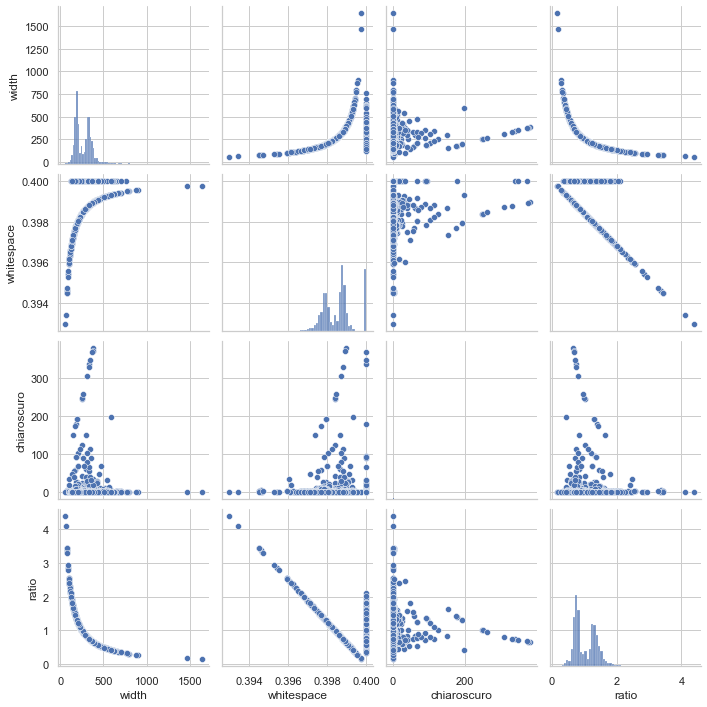

In [13]:
sns.pairplot(museum);

<AxesSubplot:>

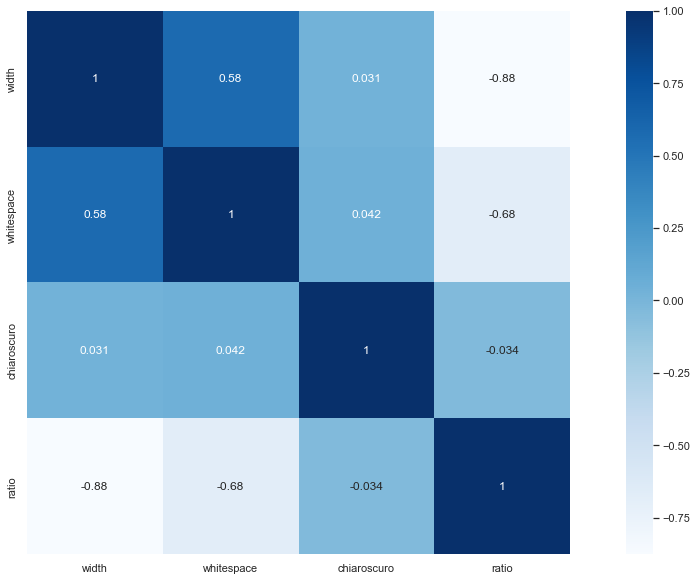

In [40]:
sns.heatmap(museum.corr(), square=True, annot=True, cmap='Blues')

<Figure size 1440x3600 with 0 Axes>

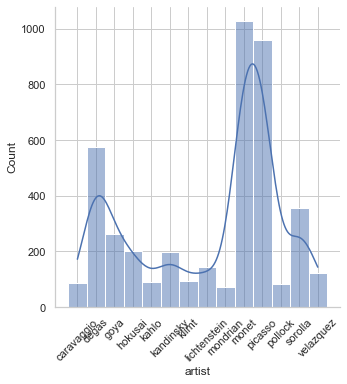

In [32]:
plt.figure(figsize=(20,50))
ax = sns.displot(museum['artist'], kde=True)
plt.xticks(rotation=45);

___
### TRAINING

In [33]:
# Set X, y
X = museum.iloc[:, 2:-1]
y = museum['group']

In [38]:
# Generate train/test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2,
                                                    random_state=42)

___
### LINEAR REGRESION

In [41]:
# Instance model
model = LinearRegression()

# Fit model
model.fit(X_train, y_train)

ValueError: could not convert string to float: '#BF7F7F'